In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random

# Linear Regression

##### author: Daodeiv

### Intro

#####  LR is basic and comonly used type of predictive analysis.Also linear regression is verry old way to crating the math model of physic experiment ,because every experiment has a noice(error measurments ) with some standart deviation ,by linear regresion the noice can be remove.
### The overall idea of regression is to examine two things 
###### 1) does a set of predictor variables do a good job in prediction an outcome (dependent) variable ?
###### 2)Which variables in paricular are significat predictorsof outcome variable,and in what wau do they-indicated by the magnitude and sign of the beta estimates–impact the outcome variable?

### Methods 

##### let to define  math lienear  function with some noice


In [164]:
def our_function(show='False'):
    a =4
    c =-10
    f = lambda x : a*x + c + np.random.uniform(0,4)
    x_args = np.linspace(0,10)
    y_args = [f(i) for i in x_args]
    plt.scatter(x_args,y_args)
    if show:
        ##plt.show()
        pass

def plot_function(a,b,cost,show='False'):
    f = lambda x,a,b : a*x +b
    l = "{}*x_i + {}".format(a,b)
    x_args = np.linspace(0,10)
    our_function()
    y_args = [f(i,a,b) for i in x_args]
    plt.plot(x_args,y_args)
    plt.text(0,20,"cost value = {} a={} b={} ".format(str(cost),a,b))
    if show:
        plt.legend()
        plt.show()
    

#### our goal is  to find the function f= a*x+b which describe  X and Y values most better way

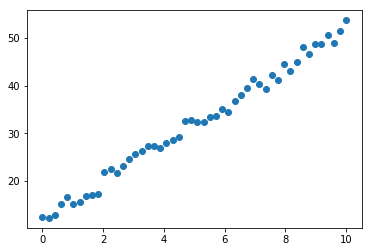

In [84]:
our_function()

deleted ### we can see that 4.5*x +15 is the best model,no maybe exists better model
### but out purpose is the implement alogoritm which the mashine will have the best model
#### if we get sum the diference between predicted value and actual value this can be give the some udestanding of which model is good
 $\sum_i{(y_ipredict-y_iactual)^2}$ 
but this function has 2 big problem first the derivate of the fuction is constant,second for us is the import modul of $Y_ipredict-y_iactual$
The function wich will give us the best approach is 1) $$\sum_i{(y_ipredict-y_iactual)^2}$$  
##### is called cost function
##### why  the function is good ?
##### 1) first because it give us the abosolute diference between predicted value and actual vaulu
##### 2) the funcction is differentiable function in every point(in belowe we will se why this so importent)
##### 3) !!! remember our purpose is to find where $\sum_i{(y_ipredict-y_iactual)^2}$  get minimum value not what is this value

##### in more detail written the function looks like this  
$$\sum_i{\sqrt{(Y_ipredict^2-y_iactual^2)}}=\sum_i{(a*x+b)^2-y_iactual^2)}$$ 

#### lets to check for above examples for which a,b the cost function is smallest


In [175]:
def cost(a,b,x_args,y_actual_args):
    """
    takes a_predict,b_predict predict value for a and b
    takse x_args,y_actual_args actual values 
    return the the value of cost function
    """
    
    f = lambda x,a,b : a*x + b
    y_actual = np.array(y_actual_args)
  
    y_predict = np.array([f(i,a,b) for i in x_args])
#     print(y_predict.shape)
#     print(y_actual.shape)
    cost = (((y_predict-y_actual)**2).sum())/(2*len(x_args))
    print('for a={} and b={} the cost function give result {}'.format(a,b,cost))
    return cost
    

    


In [176]:
f = lambda x : 4*x -10 + np.random.uniform(0,4)
x_args = np.linspace(0,10)
y_args = [f(i) for i in x_args]
#print(str(y_args))

No handles with labels found to put in legend.


for a=3 and b=4 the cost function give result 27.755716546228374


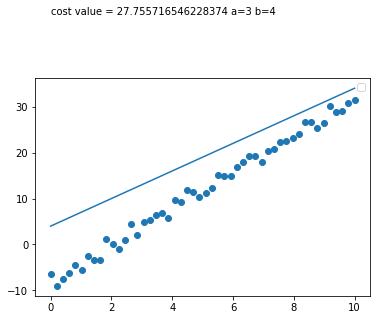

In [177]:
a=3
b=4
value = cost(a,b,x_args,y_args)
value=(str(value))
plot_function(a,b,value)

No handles with labels found to put in legend.


for a=-4 and b=15 the cost function give result 426.71291315431705


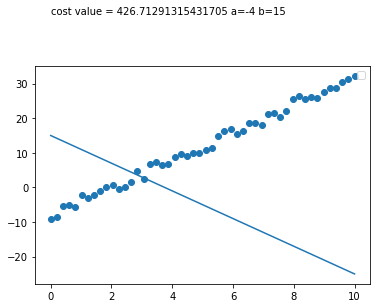

In [178]:
a=-4
b=15
value = cost(a,b,x_args,y_args)
value=(str(value))
plot_function(a,b,value)

No handles with labels found to put in legend.


for a=4 and b=-10 the cost function give result 3.124709420825368


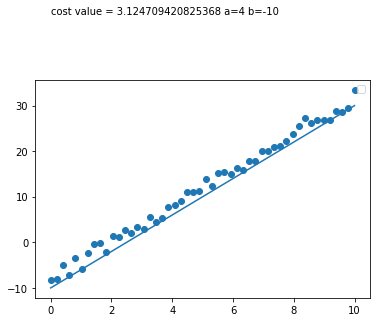

In [179]:
a=4
b=-10
value = cost(a,b,x_args,y_args)
value=(str(value))
plot_function(a,b,value)

No handles with labels found to put in legend.


for a=-4 and b=20 the cost function give result 352.9954991386201


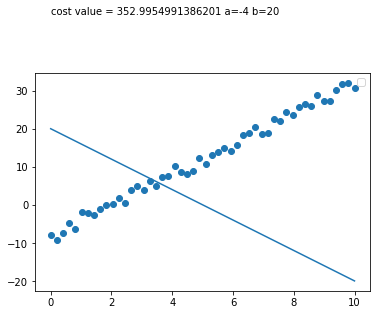

In [180]:
### from above 3 example we can see when a=4 and b=-10
### Then the cost value is most less and the model is most good

#### We have to create method to find the min value of cost fuction depends on a ,b
#### this can be make with derivate because we know that when f'(x)=0 then f(x) has min value in x 
we will use gradient descent 
see <a href='https://github.com/Daodavid93/Machine-Learning-first-steps/blob/master/Regresion%20Model/gradient%20descent.ipynb'>here</a>